## 1. Cotas de errores
Una masa “puntual” se desplaza con una velocidad inicial desconocida durante un cierto tiempo hasta que se detiene. Suponiendo que se pueden medir la distancia recorrida Δx, el coeficiente de rozamiento μ, y la masa m del objeto, todos con sus incertezas asociadas, determinar mediante montecarlo las cotas máximas y mínimas de incerteza y la velocidad inicial a la que se dirigía el móvil y el tiempo que tardó en detenerse.<br>
Considere $ v^2 - v_{0}^2 = 2 a \Delta x$, $ N = P $, $P = m g$ y $F_r = \mu N$, de forma que reemplazando todo, la expresión de la velocidad inicial sea $ v_0 = \sqrt{2 \Delta x \mu g }$<br>
Mediante estas expresiones, se puede determinar el tiempo de desplazamiento como $t = \frac{\sqrt{(2 \Delta x \mu g)}}{\mu g} = \sqrt{\frac{2 \Delta x}{\mu g}}$<br>
Utilizar $\Delta x = 10 \pm 1 m $ y $\mu = 0.5 \pm 0.1$<br>
Con estas expresiones, propagar incertezas y comprobar validez por MonteCarlo

media velocidad:  9.88 m/s, sigma: 0.64 , 2 sigma: 1.28
media tiempo:  2.03 s, sigma: 0.13 , 2 sigma: 0.27


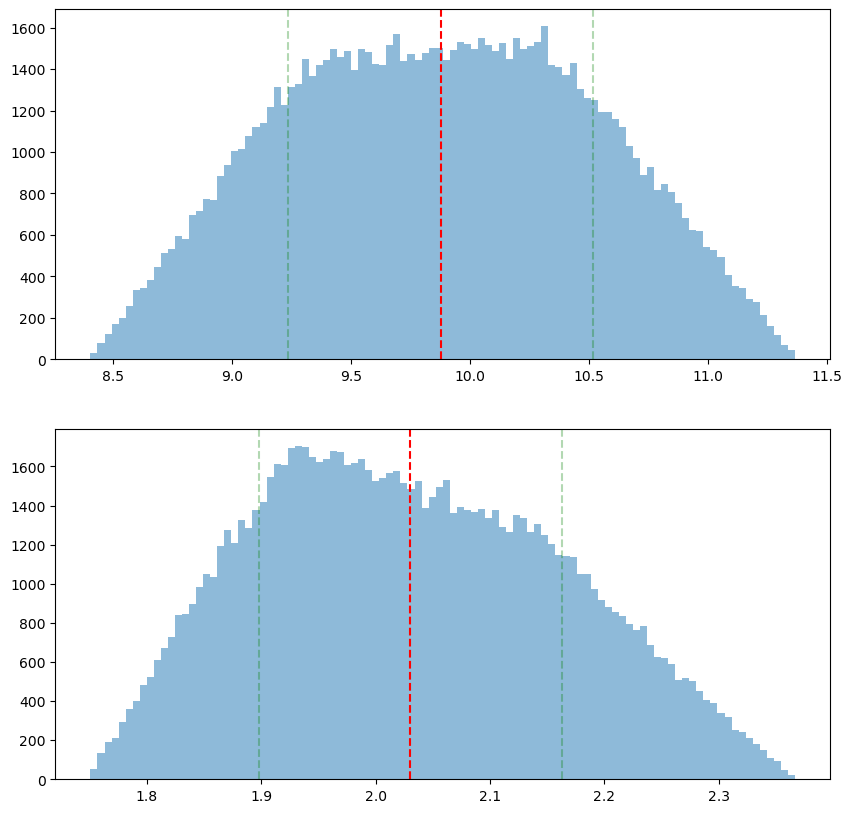

velocidad analitica:  9.9 m/s, err: 0.15
tiempo analitico:  2.02 s, err: 0.15


In [9]:
import numpy as np
import matplotlib.pyplot as plt

N = 100000 #iteraciones
g = 9.8

x_max = 11
x_min= 9
mu_max = 0.6
mu_min = 0.4

# muestreo
x = np.random.random(N) * (x_max - x_min) +  x_min
mu = np.random.random(N) * (mu_max - mu_min) + mu_min

# resultado
v0 = np.sqrt( 2 * x * mu * g)
t = np.sqrt( 2 * x / (mu * g))

v0_mean = np.mean(v0)
t_mean = np.mean(t)

v0_std = np.std(v0)
v0_std_2 = np.std(v0)*2
t_std = np.std(t)
t_std_2 = np.std(t)*2

print('media velocidad: ', round(v0_mean,2),'m/s, sigma:' , round(v0_std,2),', 2 sigma:', round(v0_std_2,2) )
print('media tiempo: ', round(t_mean,2),'s, sigma:' , round(t_std,2),', 2 sigma:', round(t_std_2,2) )
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

ax[0].hist(v0,100, alpha = 0.5)
ax[0].axvline(v0_mean, color = 'red', linestyle = '--', label = 'media')
ax[0].axvline(v0_mean + (v0_std), color = 'green', alpha = 0.3, linestyle = '--', label = 'std')
ax[0].axvline(v0_mean - (v0_std), color = 'green', alpha = 0.3, linestyle = '--', label = 'std')

ax[1].hist(t,100, alpha = 0.5)
ax[1].axvline(t_mean, color = 'red', linestyle = '--', label = 'media')
ax[1].axvline(t_mean + (t_std), color = 'green', alpha = 0.3, linestyle = '--', label = 'std')
ax[1].axvline(t_mean - (t_std), color = 'green', alpha = 0.3, linestyle = '--', label = 'std')
plt.show()

### Errores: analiticamente, como para contrastar

v0_analitica = np.sqrt( 2 * 10 * 0.5 * g)
t_analitica = np.sqrt( 2 * 10 / (0.5 * g))

err_x = 1 / 10 
err_mu = 0.1 / 0.5

err_abs = (err_x + err_mu) * 0.5

print('velocidad analitica: ', round(v0_analitica,2),'m/s, err:' , round(err_abs,2) )
print('tiempo analitico: ', round(t_analitica,2),'s, err:' , round(err_abs,2) )

##  2. Peugeot 504 vs Citroen IES
leer 'Calculo de cotas de error en accidentología usando la técnica de MonteCarlo' de Ernesto Martinez. Instituto Balseiro. CNEA. 2003


media velocidad:  25.07 m/s, sigma: 0.83 , 2 sigma: 1.66


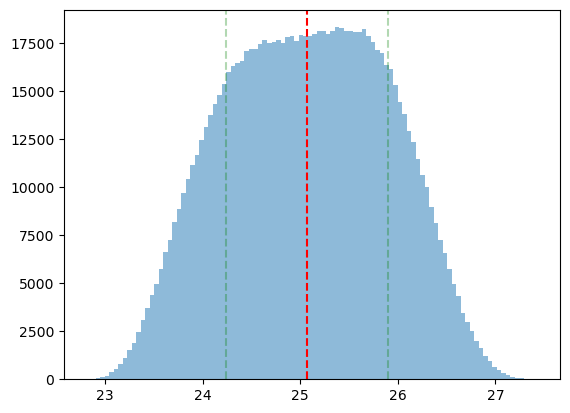

In [16]:

import numpy as np
import matplotlib.pyplot as plt

def v_peugeot(x, m_504, m_ies, mu_504, mu_ies):
    g = 9.8 #m/s^2
    return np.sqrt(
        (np.sqrt(2 * g * mu_504 * (14.3 - x)) 
         + (m_ies / m_504) * ( (11.38 - x) * np.sqrt(2 * g * mu_ies) 
         / ((11.38 - x)**2 + 4.93**2)**(1/4)) )**2
        + 2 * g * mu_504 * (13.6 + x)
    )

N = 1000000 #iteraciones

# muestreo
x = np.random.random(N) * 3.0 - 1.5
m_ies = 50 * np.random.random(N) + 500 #kg, llevaba una sola persona, en el articulo le estima 40 kg, aunque me parece poco
m_504 = 80 * np.random.random(N) +  1200 #kg, llevaba dos personas, en el articulo le estima 60 kg, me parece poco.
mu_ies = 0.2 * np.random.random(N) + 0.7 #el coeficiente de rozamiento varia segun el estado de las cubiertas. 
mu_504 = 0.2 * np.random.random(N) + 0.7 #el coeficiente de rozamiento varia segun el estado de las cubiertas. 

# resultado
v_p = v_peugeot(x, m_504, m_ies, mu_504, mu_ies)
v_mean = np.mean(v_p)
v_std = np.std(v_p)
v_std_2 = np.std(v_p)*2

print('media velocidad: ', round(v_mean,2),'m/s, sigma:' , round(v_std,2),', 2 sigma:', round(v_std_2,2) )
ax = plt.figure().add_subplot( )

ax.hist(v_p,100, alpha = 0.5)
ax.axvline(v_mean, color = 'red', linestyle = '--', label = 'media')
ax.axvline(v_mean + (v_std), color = 'green', alpha = 0.3, linestyle = '--', label = 'std')
ax.axvline(v_mean - (v_std), color = 'green', alpha = 0.3, linestyle = '--', label = 'std')
